In [1]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# method for uploading data from local drive: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
from google.colab import files
uploaded = files.upload()

Saving Cluster membership data.csv to Cluster membership data.csv


In [3]:
# Importing the dataset
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Cluster membership data.csv']))
print(dataset)

       Total Purch  Churn Score  ...  Average order value  Buy Membership
0               21     1.000000  ...                 1577               1
1               26     1.000000  ...                 1312               1
2                8     1.000000  ...                 1327               1
3                5     1.000000  ...                 1669               1
4                9     1.000000  ...                 1660               1
...            ...          ...  ...                  ...             ...
20262           46     0.997501  ...                 1136               1
20263            9     1.000000  ...                  763               0
20264           16     1.000000  ...                  510               2
20265           49     0.999879  ...                 1473               0
20266           58     0.000192  ...                  934               1

[20267 rows x 7 columns]


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20267 entries, 0 to 20266
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total Purch            20267 non-null  int64  
 1   Churn Score            20267 non-null  float64
 2   Benefits Used          20267 non-null  int64  
 3   Life Time Purch Value  20267 non-null  int64  
 4   Months Logged in       20267 non-null  int64  
 5   Average order value    20267 non-null  int64  
 6   Buy Membership         20267 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.1 MB


In [13]:
X = dataset.iloc[:, [4,5]].values
y = dataset.iloc[:, 6].values

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

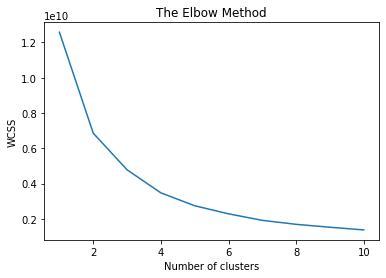

In [16]:
# K-Means Clustering

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

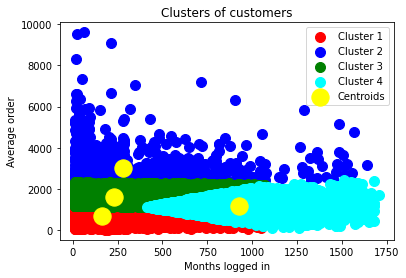

In [19]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Months logged in')
plt.ylabel('Average order')
plt.legend()
plt.show()